In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# read data

In [2]:
df=pd.read_csv("salaries.csv")
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


# preProssing

In [3]:
# preprocesssing
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dfle=df
dfle['company']=le.fit_transform(dfle['company'])
dfle['job']=le.fit_transform(dfle['job'])
dfle['degree']=le.fit_transform(dfle['degree'])
dfle.head()


,company,job,degree,salary_more_then_100k
0,2,2,0,0
1,2,2,1,0
2,2,0,0,1
3,2,0,1,1
4,2,1,0,0


# select train and test data 

In [4]:

from sklearn.model_selection import train_test_split
column=dfle.columns
X=dfle[[column[0],column[1],column[2]]]
Y=dfle[column[-1]]
xTrain,xTest,yTrain,yTest=train_test_split(X,Y,train_size=0.9)
xTrain,xTest,yTrain,yTest

(    company  job  degree
 4         2    1       0
 6         0    2       1
 2         2    0       0
 11        1    2       1
 3         2    0       1
 8         0    0       0
 10        1    2       0
 1         2    2       1
 12        1    0       0
 15        1    1       1
 13        1    0       1
 14        1    1       0
 7         0    1       0
 9         0    0       1,
    company  job  degree
 0        2    2       0
 5        2    1       1,
 4     0
 6     0
 2     1
 11    1
 3     1
 8     0
 10    1
 1     0
 12    1
 15    1
 13    1
 14    1
 7     0
 9     1
 Name: salary_more_then_100k, dtype: int64,
 0    0
 5    1
 Name: salary_more_then_100k, dtype: int64)

In [5]:
model=DecisionTreeClassifier()
model.fit(xTrain,yTrain)
model.predict([[0,2,0]])

array([0], dtype=int64)

In [6]:
pre=model.predict(X)
pre

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

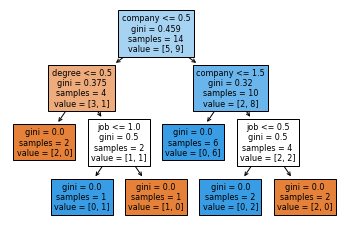

In [7]:
import matplotlib
gg=tree.plot_tree(model,filled=True,feature_names=[column[0],column[1],column[2]],)
